In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Import train and test data
df_train = pd.read_csv('D:\Machine Learning\Kaggle\Forest Cover/train.csv')
df_test = pd.read_csv('D:\Machine Learning\Kaggle\Forest Cover/test.csv')

In [69]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [70]:
df_train.shape

(15120, 56)

In [71]:
df_test.shape

(565892, 55)

In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [73]:
df_train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

#No categorical data. All are numerical

In [74]:
pd.set_option('display.max_columns', None) # we need to see all the columns
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

# Inferences
Count is 15120 for each column, so no data point is missing.

Soil type 7 and 15 are constant(each value is zero), so they can be removed.

Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis.

Scales are not the same for all. Hence, rescaling and standardisation may be necessary for some algos.

In [75]:
# Removing soil_type 7 & 15 from both train and test data
df_train = df_train.drop(['Soil_Type7', 'Soil_Type15'], axis = 1)
df_test = df_test.drop(['Soil_Type7', 'Soil_Type15'], axis = 1)

# Also drop 'Id'
df_train = df_train.iloc[:,1:]
df_test = df_test.iloc[:,1:]

# Correlation matrix (heatmap)
Correlation requires continuous data. Hence, ignore Wilderness_Area and Soil_Type as they are binary values

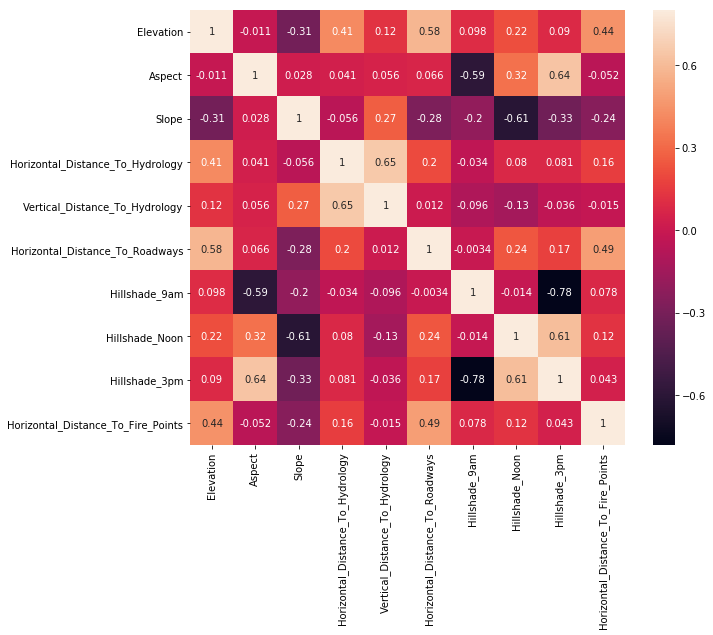

In [76]:
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df_train.iloc[: , :10].corr(), vmax=0.8, square=True, annot=True)

In [77]:
data = df_train.iloc[:,:10]

# Get name of the columns
cols = data.columns

# Calculate the pearson correlation coefficients for all combinations
data_corr = data.corr()

In [78]:
data_corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


In [79]:
# Threshold ( only highly correlated ones matter)
threshold = 0.5
corr_list = []

# Sorting out the highly correlated values
for i in range(0, 10):
    for j in range(i+1, 10):
        if data_corr.iloc[i,j]>= threshold and data_corr.iloc[i,j]<1\
        or data_corr.iloc[i,j] <0 and data_corr.iloc[i,j]<=-threshold:
            corr_list.append([data_corr.iloc[i,j],i,j])

In [80]:
# Sorting the values
s_corr_list = sorted(corr_list, key= lambda x: -abs(x[0]))

# print the higher values
for v,i,j in s_corr_list:
    print("%s and %s = %.2f" % (cols[i], cols[j], v))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


In [81]:
s_corr_list

[[-0.779964742447544, 6, 8],
 [0.6521424712357364, 3, 4],
 [0.635022364019874, 1, 8],
 [0.6145263872475779, 7, 8],
 [-0.6126128724172692, 2, 7],
 [-0.5939974281313112, 1, 6],
 [0.5786589907340067, 0, 5]]

In [82]:
# Skewness
# Presence of skewness can be easily noticed
df_train.iloc[:,:10].skew()

Elevation                             0.075640
Aspect                                0.450935
Slope                                 0.523658
Horizontal_Distance_To_Hydrology      1.488052
Vertical_Distance_To_Hydrology        1.537776
Horizontal_Distance_To_Roadways       1.247811
Hillshade_9am                        -1.093681
Hillshade_Noon                       -0.953232
Hillshade_3pm                        -0.340827
Horizontal_Distance_To_Fire_Points    1.617099
dtype: float64

# Skewness
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.

Skewness in statistics represents an imbalance and an asymmetry from the mean of a data distribution. In a normal data distribution with a symmetrical bell curve, the mean and median are the same. In a skewed data distribution, the median and the mean are different values

# Data Visualisation

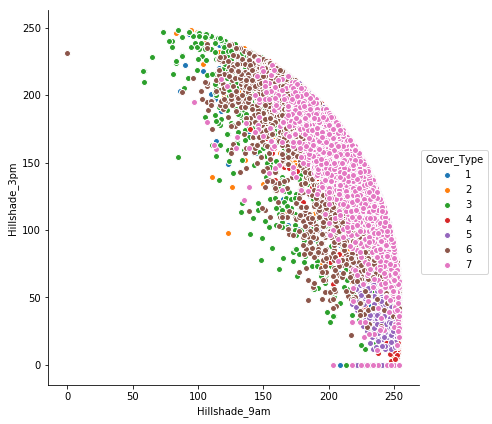

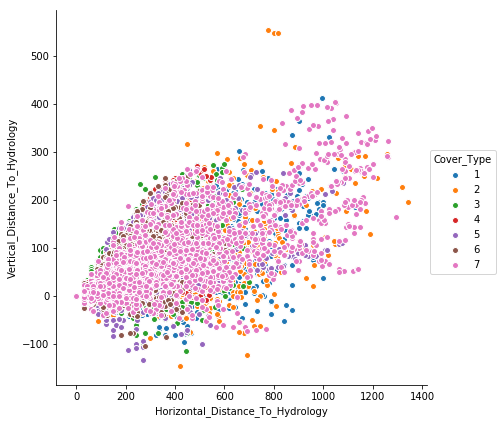

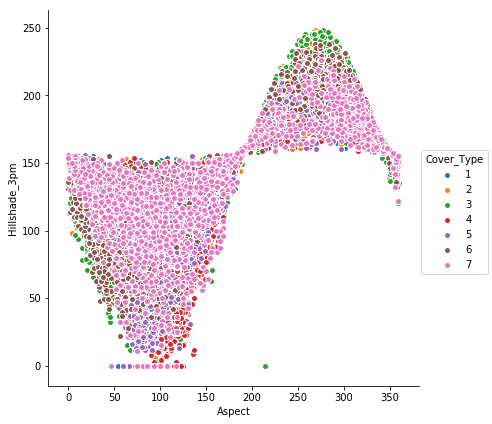

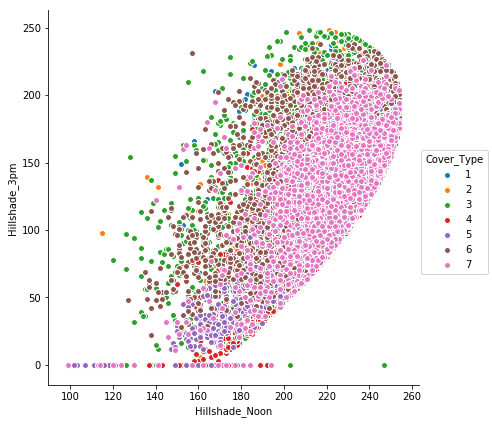

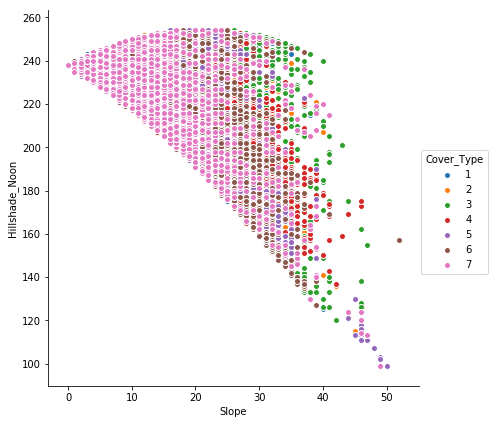

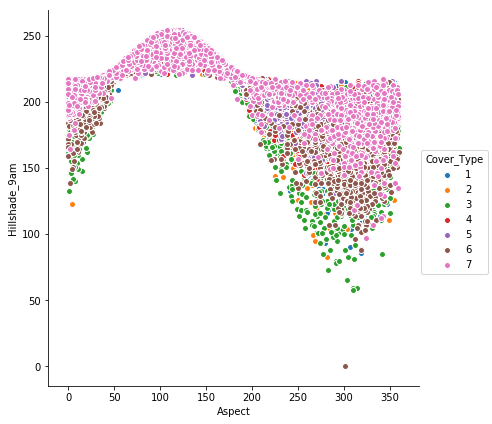

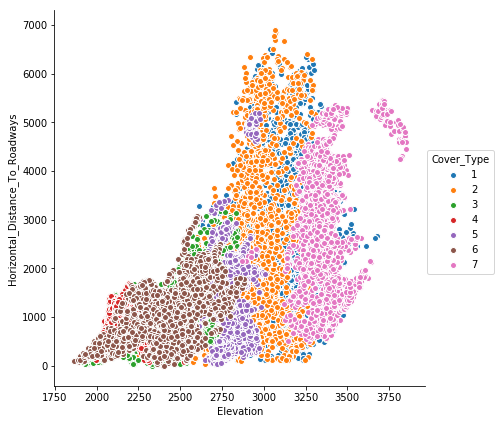

In [83]:
# Pair wise scatter plot with hue being 'Cover_Type'
for v,i,j in s_corr_list:
    sns.pairplot(data = df_train, hue='Cover_Type', size= 6, x_vars=cols[i], y_vars=cols[j])
    plt.show()

Horizontal and vertical distance to hydrology seems to have a linear relation

Hillside and Aspect seems to have a sigmoid relation given by:

1/(1+e−x)

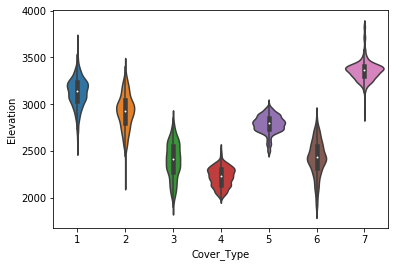

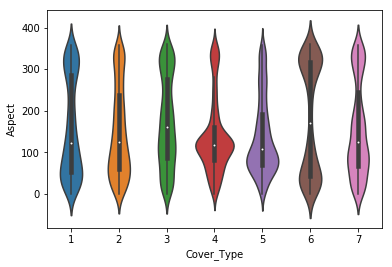

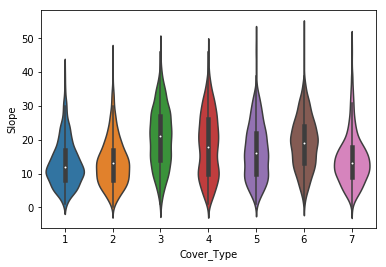

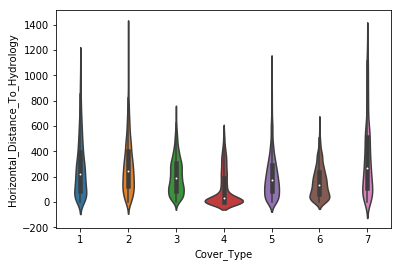

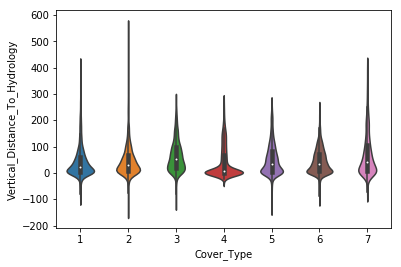

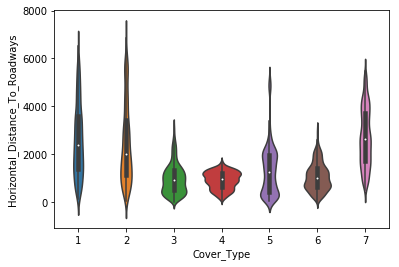

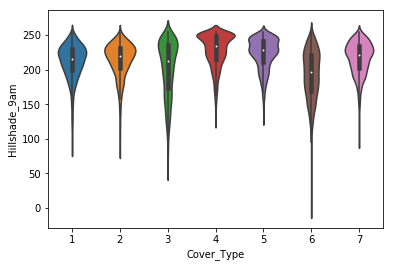

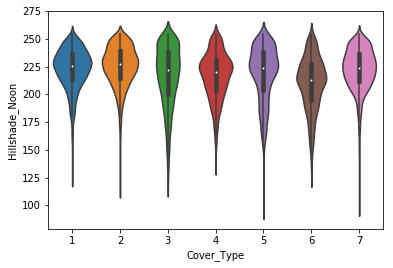

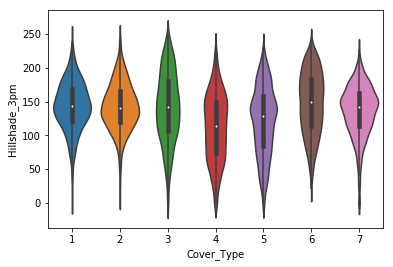

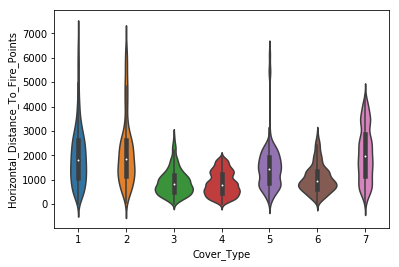

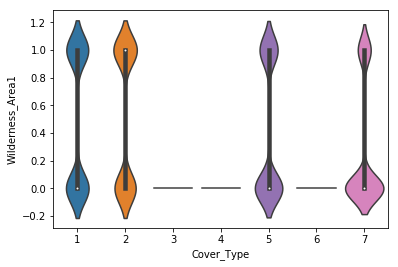

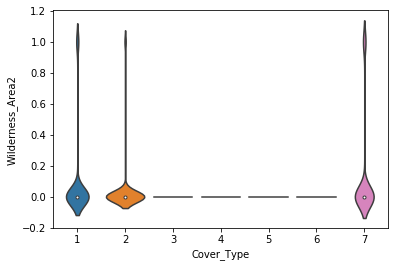

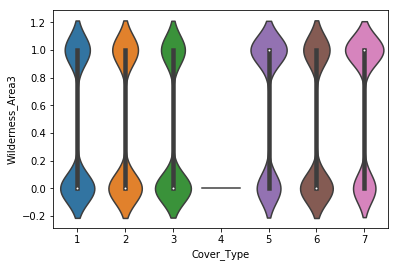

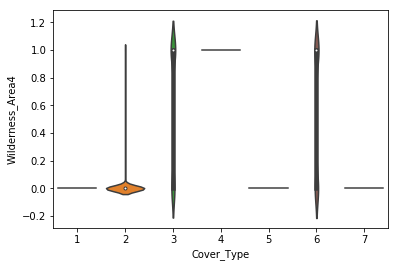

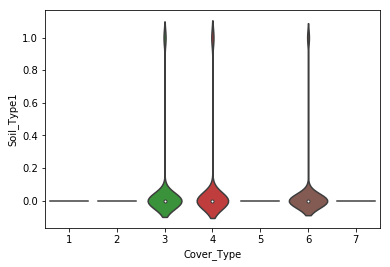

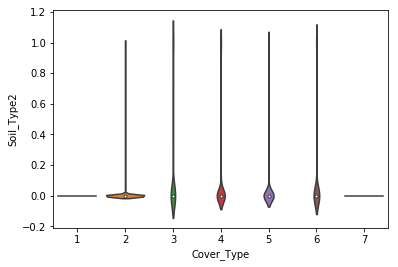

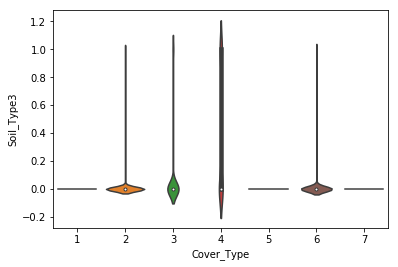

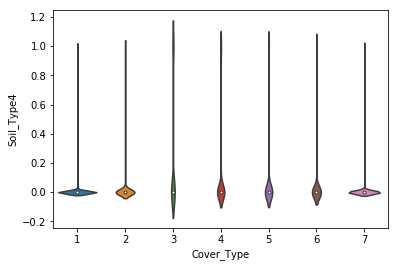

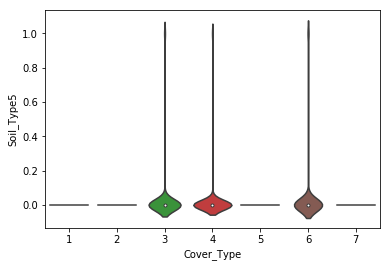

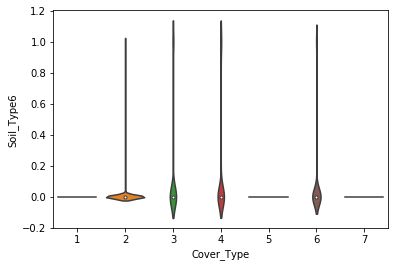

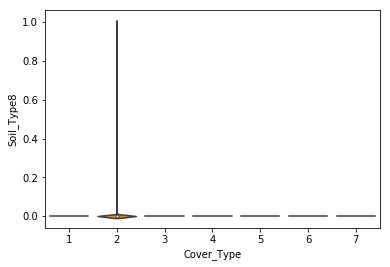

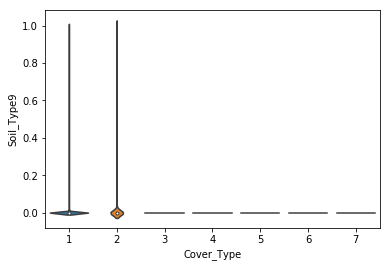

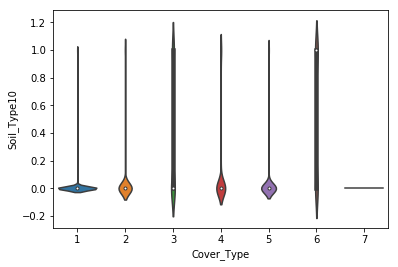

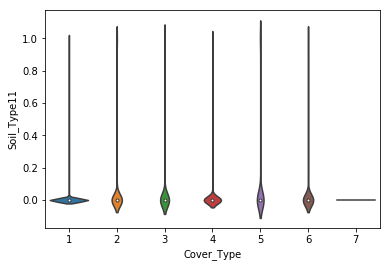

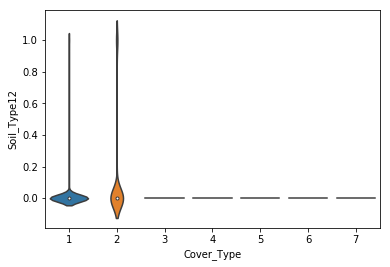

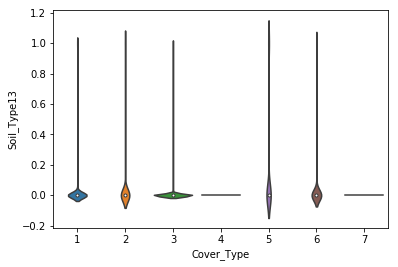

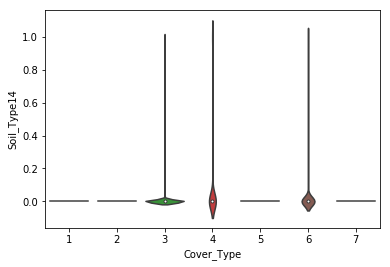

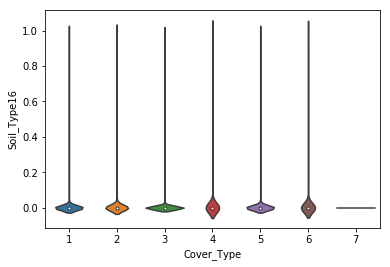

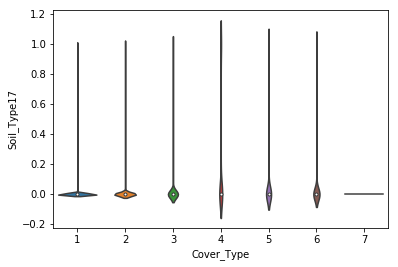

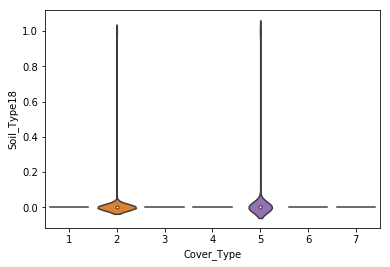

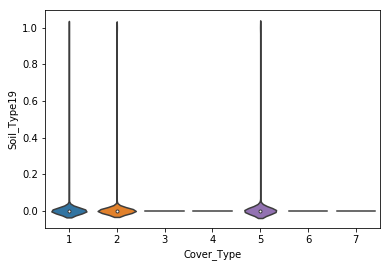

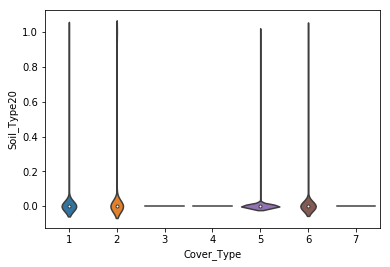

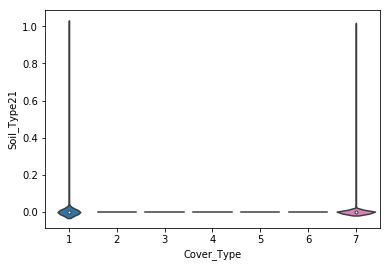

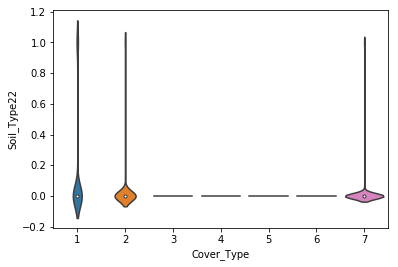

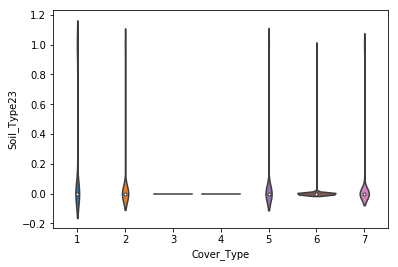

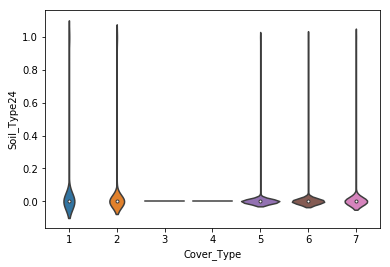

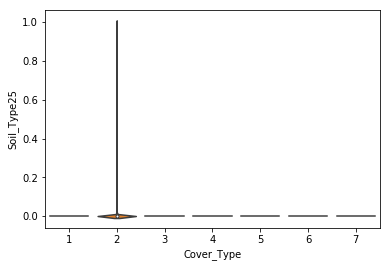

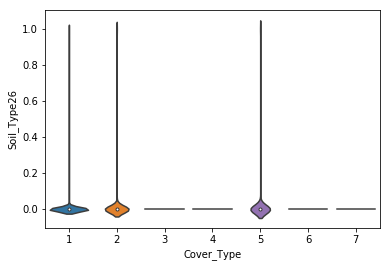

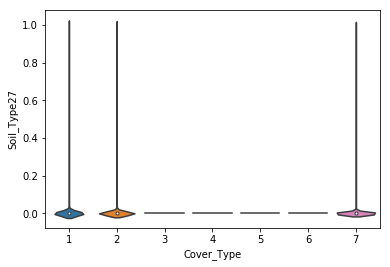

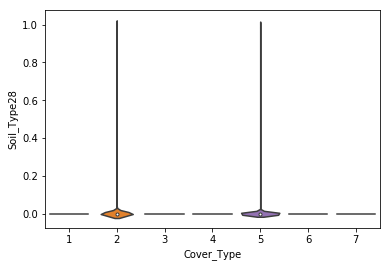

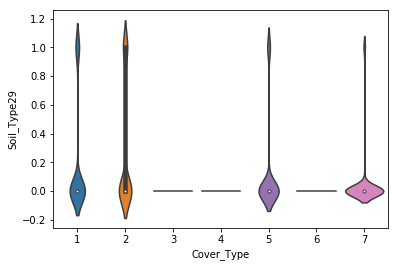

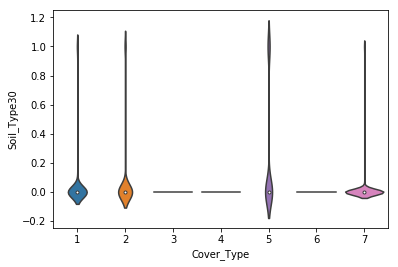

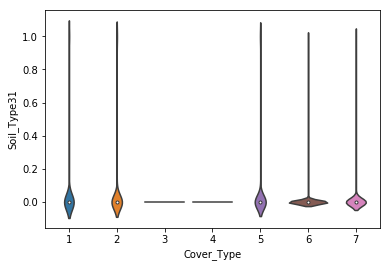

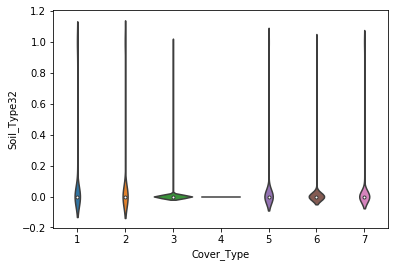

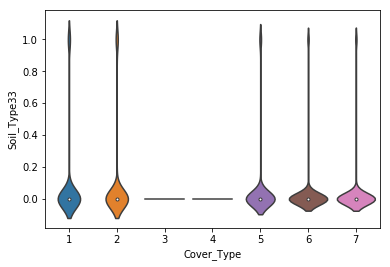

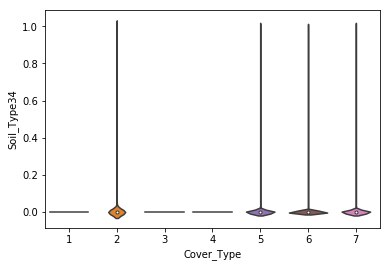

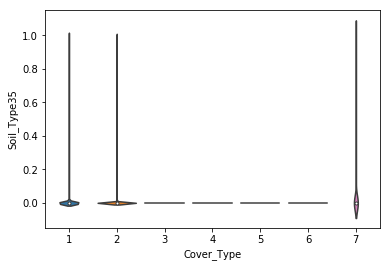

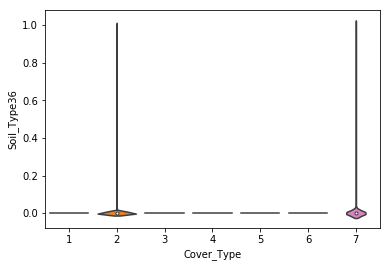

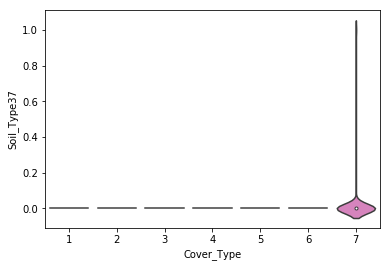

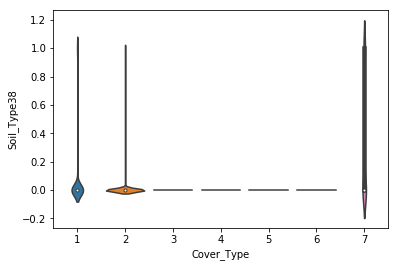

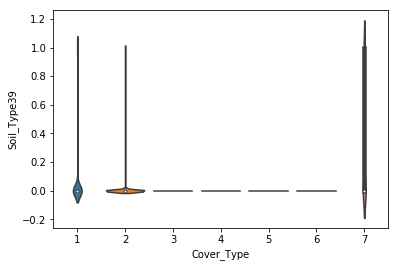

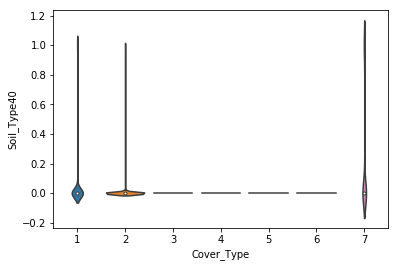

In [84]:
# A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.
cols = df_train.columns
size = len(cols) - 1 # We don't need the target attribute
# x-axis has target attributes to distinguish between classes
x = cols[size]
y = cols[0:size]

for i in range(0, size):
    sns.violinplot(data=df_train, x=x, y=y[i])
    plt.show()

Elevation has a seperate distribution for each class, hence an important attribute for prediction

Aspect plot contains couple of normal distribution for several classes

Horizontal distance to hydrology and roadways is quite similar

Hillshade 9am and 12pm displays left skew (long tail towards left)

Wilderness_Area3 gives no class distinction. As values are not present, others give some scope to distinguish

Soil_Type, 1,5,8,9,12,14,18-22, 25-30 and 35-40 offer class distinction as values are not present for many classes

In [85]:
df_train.Wilderness_Area2.value_counts()

0    14621
1      499
Name: Wilderness_Area2, dtype: int64

Too many zero values means attributes like it shows class distinction

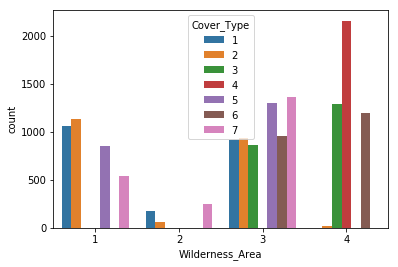

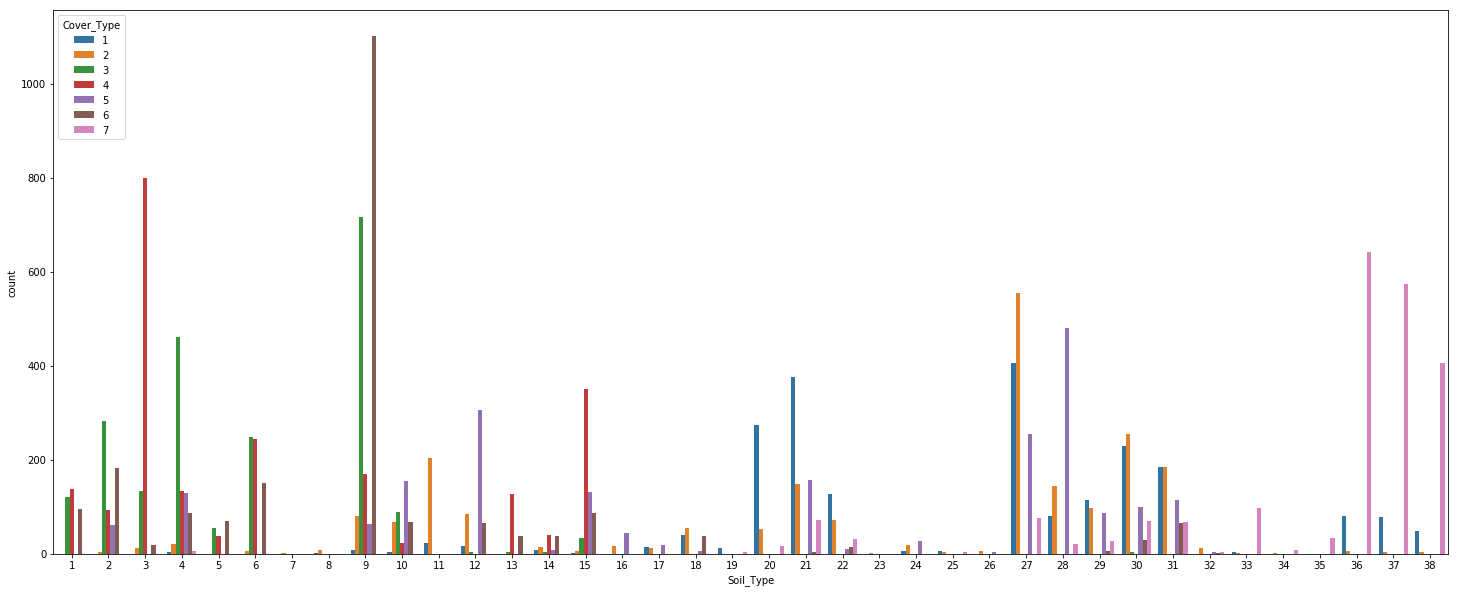

In [86]:
### Group one-hot encoded variables of a category into one single variable
cols = df_train.columns
r,c = df_train.shape

# Create a new dataframe with r rows, one column for each encoded category, and target in the end
new_data = pd.DataFrame(index= np.arange(0,r), columns=['Wilderness_Area', 'Soil_Type', 'Cover_Type'])

# Make an entry in data for each r for category_id, target_value
for i in range(0,r):
    p = 0;
    q = 0;
    # Category1_range
    for j in range(10,14):
        if (df_train.iloc[i,j] == 1):
            p = j-9 # category_class
            break
    # Category2_range
    for k in range(14,54):
        if (df_train.iloc[i,k] == 1):
            q = k-13 # category_class
            break
    # Make an entry in data for each r
    new_data.iloc[i] = [p,q,df_train.iloc[i, c-1]]
    
# plot for category1
sns.countplot(x = 'Wilderness_Area', hue = 'Cover_Type', data = new_data)
plt.show()

# Plot for category2
plt.rc("figure", figsize = (25,10))
sns.countplot(x='Soil_Type', hue = 'Cover_Type', data= new_data)
plt.show()

Wilderness_Area4 has lot of presence of cover_type 4, good class distinction

SoilType 1-6,9-13,15, 20-22, 27-31,35,36-38 offer lot of class distinction as counts for some are very high

# Data Preparation

Delete rows or impute values in case of missing

Check for data transformation

Some of the soil_types is present in very few Cover_Types

In [87]:
# Checking the value count for different soil_types
for i in range(10, df_train.shape[1]-1):
    j = df_train.columns[i]
    print (df_train[j].value_counts())

0    11523
1     3597
Name: Wilderness_Area1, dtype: int64
0    14621
1      499
Name: Wilderness_Area2, dtype: int64
0    8771
1    6349
Name: Wilderness_Area3, dtype: int64
0    10445
1     4675
Name: Wilderness_Area4, dtype: int64
0    14765
1      355
Name: Soil_Type1, dtype: int64
0    14497
1      623
Name: Soil_Type2, dtype: int64
0    14158
1      962
Name: Soil_Type3, dtype: int64
0    14277
1      843
Name: Soil_Type4, dtype: int64
0    14955
1      165
Name: Soil_Type5, dtype: int64
0    14470
1      650
Name: Soil_Type6, dtype: int64
0    15119
1        1
Name: Soil_Type8, dtype: int64
0    15110
1       10
Name: Soil_Type9, dtype: int64
0    12978
1     2142
Name: Soil_Type10, dtype: int64
0    14714
1      406
Name: Soil_Type11, dtype: int64
0    14893
1      227
Name: Soil_Type12, dtype: int64
0    14644
1      476
Name: Soil_Type13, dtype: int64
0    14951
1      169
Name: Soil_Type14, dtype: int64
0    15006
1      114
Name: Soil_Type16, dtype: int64
0    14508
1      

In [88]:
# Let's drop them
df_train = df_train.drop(['Soil_Type8', 'Soil_Type25'], axis=1)
df_test = df_test.drop(['Soil_Type8', 'Soil_Type25'], axis=1)
df_train1 = df_train # To be used for algos like SVM where we need normalization and StandardScaler
df_test1 = df_test # To be used under normalization and StandardScaler

# Normality

(Needed only for few ML algorithms like SVM)

In [89]:
# Checking for data transformation (take only non-categorical values)
df_train.iloc[:,:10].skew()

Elevation                             0.075640
Aspect                                0.450935
Slope                                 0.523658
Horizontal_Distance_To_Hydrology      1.488052
Vertical_Distance_To_Hydrology        1.537776
Horizontal_Distance_To_Roadways       1.247811
Hillshade_9am                        -1.093681
Hillshade_Noon                       -0.953232
Hillshade_3pm                        -0.340827
Horizontal_Distance_To_Fire_Points    1.617099
dtype: float64

Data transformation needed in: 'Horizontal n vertical distance', 'Hillshade_9am & noon'

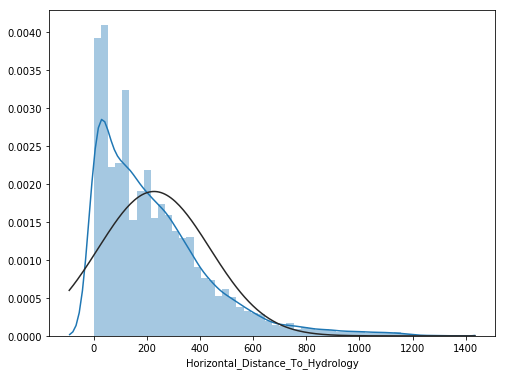

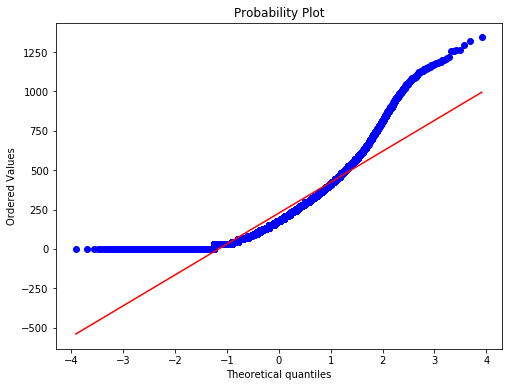

In [90]:
#Horizontal_Distance_To_Hydrology
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(df_train1['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Horizontal_Distance_To_Hydrology'], plot=plt)

It shows positive skewness (log or squared transformations will be a good option)

In [91]:
df_train1['Horizontal_Distance_To_Hydrology'] = np.sqrt(df_train1['Horizontal_Distance_To_Hydrology'])

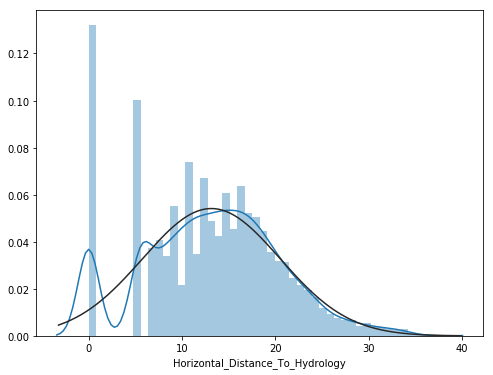

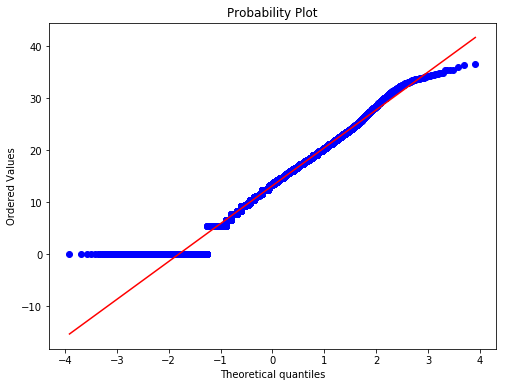

In [92]:
# Plot again after sqrt transformation
plt.figure(figsize=(8,6))
sns.distplot(df_train1['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Horizontal_Distance_To_Hydrology'], plot=plt)

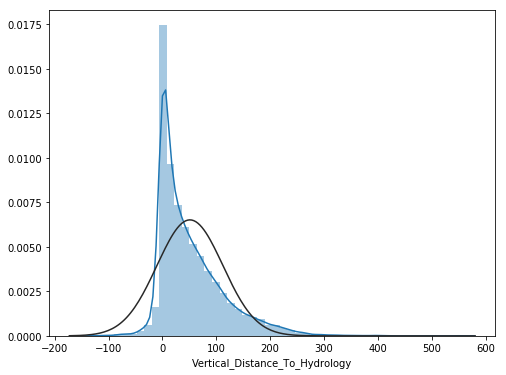

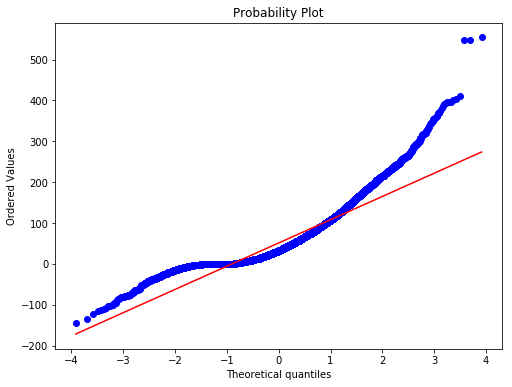

In [93]:
#Vertical_Distance_To_Hydrology
plt.figure(figsize=(8,6))
sns.distplot(df_train1['Vertical_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Vertical_Distance_To_Hydrology'], plot=plt)

Shows positive skewness

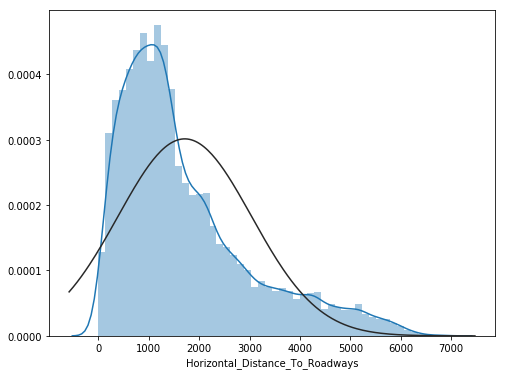

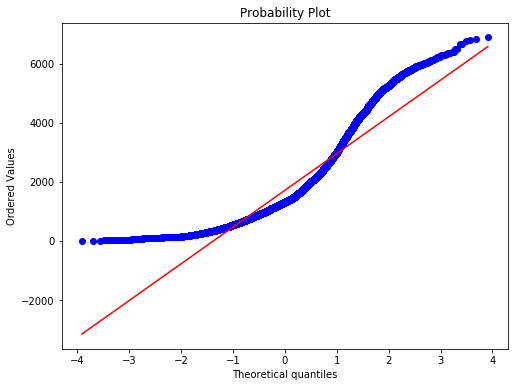

In [94]:
#Horizontal_Distance_To_Roadways
plt.figure(figsize=(8,6))
sns.distplot(df_train1['Horizontal_Distance_To_Roadways'], fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Horizontal_Distance_To_Roadways'], plot=plt)

Shows positive skewness

In [95]:
df_train1['Horizontal_Distance_To_Roadways'] = np.sqrt(df_train1['Horizontal_Distance_To_Roadways'])

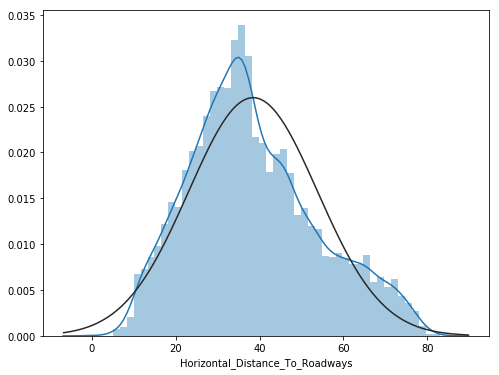

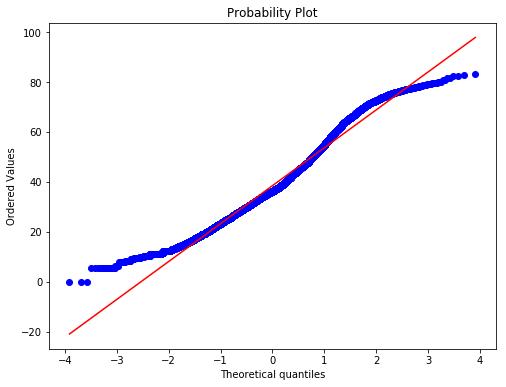

In [96]:
# Plot again after sqrt transformation
plt.figure(figsize=(8,6))
sns.distplot(df_train1['Horizontal_Distance_To_Roadways'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Horizontal_Distance_To_Roadways'], plot=plt)

Reasonable improvement noticed

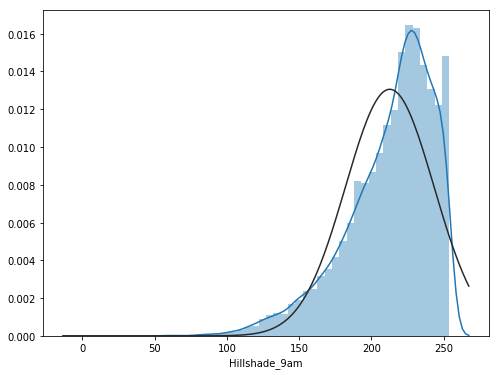

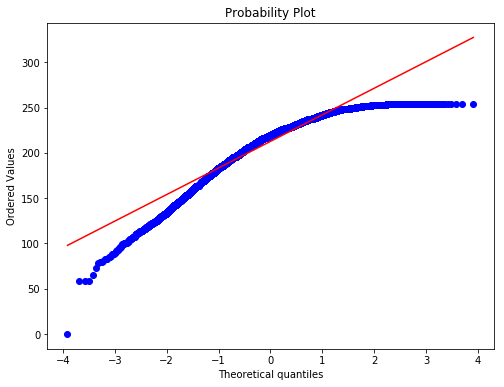

In [97]:
#Hillshade_9am
fig = plt.figure(figsize=(8,6))
sns.distplot(df_train1['Hillshade_9am'],fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Hillshade_9am'],plot=plt)

Shows negative skewness

In [98]:
df_train1['Hillshade_9am'] = np.square(df_train1['Hillshade_9am'])

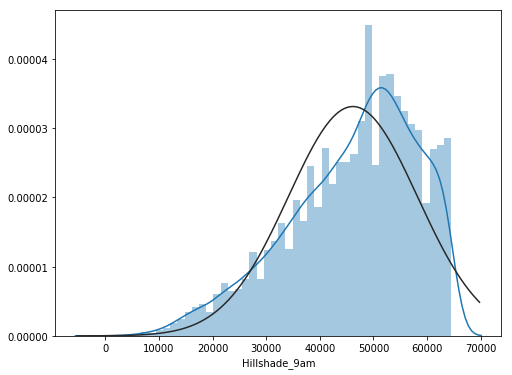

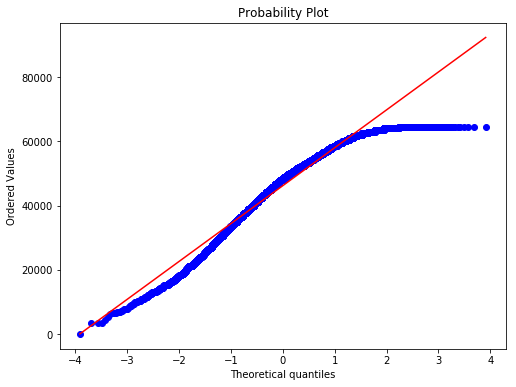

In [99]:
# Plot again after square transformation
plt.figure(figsize=(8,6))
sns.distplot(df_train1['Hillshade_9am'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Hillshade_9am'], plot=plt)

Reasonable improvement seen

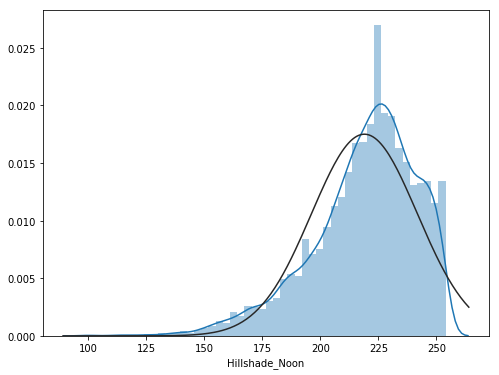

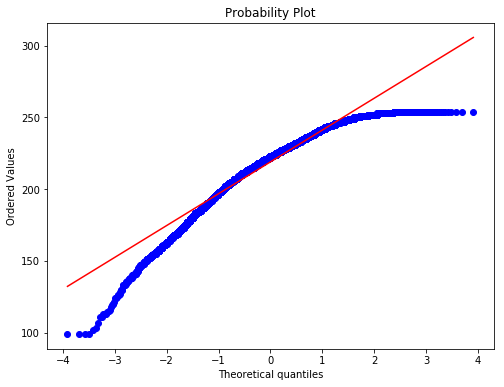

In [100]:
# Hillshade_Noon
fig = plt.figure(figsize=(8,6))
sns.distplot(df_train1['Hillshade_Noon'],fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Hillshade_Noon'],plot=plt)

Negative skewness present

In [101]:
df_train1['Hillshade_Noon'] = np.square(df_train1['Hillshade_Noon'])

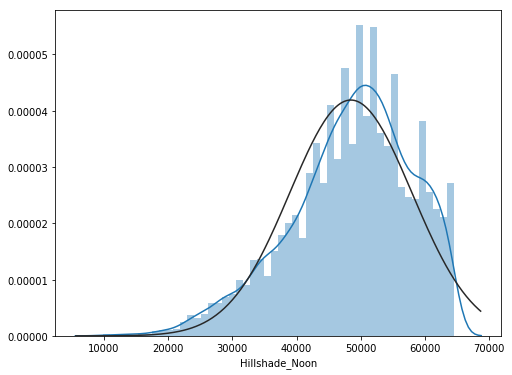

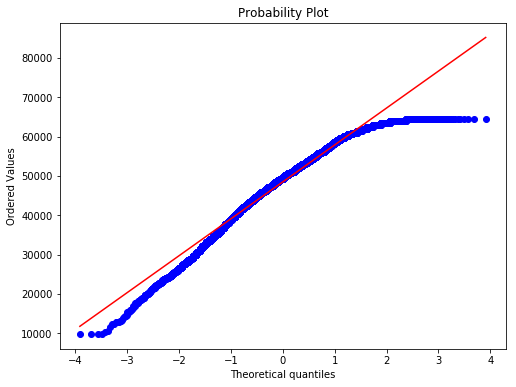

In [102]:
# Plot again after square transformation
fig = plt.figure(figsize=(8,6))
sns.distplot(df_train1['Hillshade_Noon'],fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Hillshade_Noon'],plot=plt)

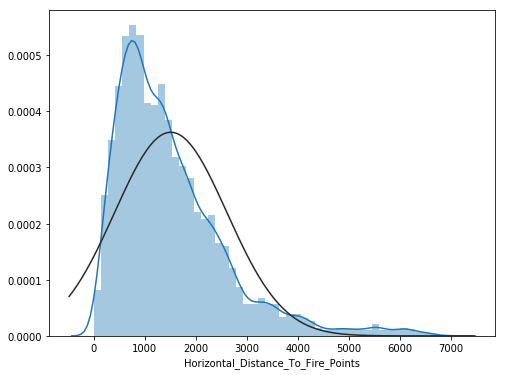

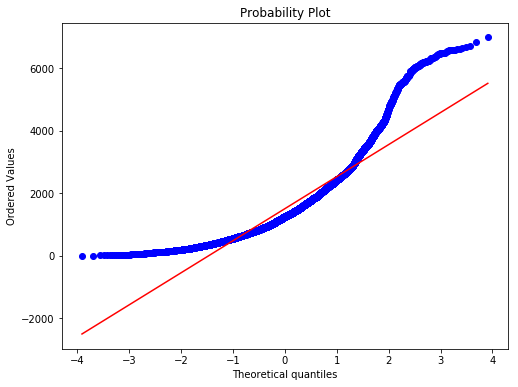

In [103]:
# Horizontal_Distance_To_Fire_Points
plt.figure(figsize=(8,6))
sns.distplot(df_train1['Horizontal_Distance_To_Fire_Points'], fit=stats.norm)
plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Horizontal_Distance_To_Fire_Points'],plot=plt)

Shows positive skewness

In [104]:
df_train1['Horizontal_Distance_To_Fire_Points'] = np.sqrt(df_train1['Horizontal_Distance_To_Fire_Points'])

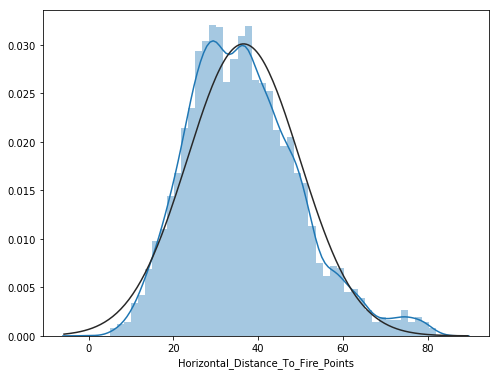

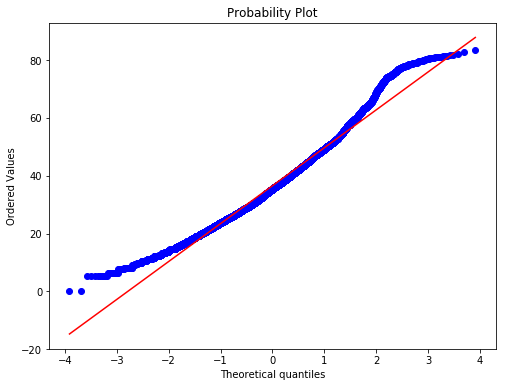

In [105]:
# Plot again after sqrt transformation
plt.figure(figsize=(8,6))
sns.distplot(df_train1['Horizontal_Distance_To_Fire_Points'], fit=stats.norm)
plt.figure(figsize=(8,6))
res = stats.probplot(df_train1['Horizontal_Distance_To_Fire_Points'],plot=plt)

Improvements clearly visible

In [106]:
# To be used in case of algorithms like SVM
df_test1[['Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points'\
        ,'Horizontal_Distance_To_Roadways']] = np.sqrt(df_test1[['Horizontal_Distance_To_Hydrology',\
        'Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Roadways']])

In [107]:
# To be used in case of algorithms like SVM
df_test1[['Hillshade_9am','Hillshade_Noon']] = np.square(df_test1[['Hillshade_9am','Hillshade_Noon']])

# Train & Test Data

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
# Taking only non-categorical values
Size = 10
X_temp = df_train.iloc[:,:Size]
X_test_temp = df_test.iloc[:,:Size]
X_temp1 = df_train1.iloc[:,:Size]
X_test_temp1 = df_test1.iloc[:,:Size]

X_temp1 = StandardScaler().fit_transform(X_temp1)
X_test_temp1 = StandardScaler().fit_transform(X_test_temp1)

In [110]:
r,c = df_train.shape
X_train = np.concatenate((X_temp,df_train.iloc[:,Size:c-1]),axis=1)
X_train1 = np.concatenate((X_temp1, df_train1.iloc[:,Size:c-1]), axis=1) # to be used for SVM
y_train = df_train.Cover_Type.values

# ML Algorithms

Support vector machines

In [111]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

In [112]:
# Setting parameters
x_data, x_test_data, y_data, y_test_data = train_test_split(X_train1,y_train,test_size=0.2, random_state=123)
svm_para = [{'kernel':['rbf'],'C': [1,10,100,100]}]

'rbf' or radial basis function is the Gaussian kernel

In [113]:
#classifier = GridSearchCV(svm.SVC(),svm_para,cv=3,verbose=2)
#classifier.fit(x_data,y_data)
#classifier.best_params_
#classifier.grid_scores_

In [114]:
# Parameters optimized using the code in above cell
C_opt = 10 # reasonable option
clf = svm.SVC(C=C_opt,kernel='rbf')
clf.fit(X_train1,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
clf.score(X_train1,y_train)

0.8056878306878307

In [116]:
# y_pred = clf.predict(X_test1)

# Extra Trees Classifier

In [117]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

# setting parameters
x_data, x_test_data, y_data, y_test_data = train_test_split(X_train,y_train,test_size= 0.3, random_state=0)
etc_para = [{'n_estimators':[20,30,100], 'max_depth':[5,10,15], 'max_features':[0.1,0.2,0.3]}] 
# Default number of features is sqrt(n)
# Default number of min_samples_leaf is 1

In [118]:
ETC = GridSearchCV(ExtraTreesClassifier(),param_grid=etc_para, cv=10, n_jobs=-1)
ETC.fit(x_data, y_data)
ETC.best_params_
ETC.grid_scores_

[mean: 0.63142, std: 0.02021, params: {'max_features': 0.1, 'n_estimators': 20, 'max_depth': 5},
 mean: 0.63464, std: 0.01585, params: {'max_features': 0.1, 'n_estimators': 30, 'max_depth': 5},
 mean: 0.63662, std: 0.01937, params: {'max_features': 0.1, 'n_estimators': 100, 'max_depth': 5},
 mean: 0.64342, std: 0.01696, params: {'max_features': 0.2, 'n_estimators': 20, 'max_depth': 5},
 mean: 0.64087, std: 0.02433, params: {'max_features': 0.2, 'n_estimators': 30, 'max_depth': 5},
 mean: 0.65656, std: 0.01531, params: {'max_features': 0.2, 'n_estimators': 100, 'max_depth': 5},
 mean: 0.65608, std: 0.01705, params: {'max_features': 0.3, 'n_estimators': 20, 'max_depth': 5},
 mean: 0.66506, std: 0.01659, params: {'max_features': 0.3, 'n_estimators': 30, 'max_depth': 5},
 mean: 0.66468, std: 0.01486, params: {'max_features': 0.3, 'n_estimators': 100, 'max_depth': 5},
 mean: 0.72525, std: 0.01627, params: {'max_features': 0.1, 'n_estimators': 20, 'max_depth': 10},
 mean: 0.72543, std: 0.019

In [119]:
print ('Best accuracy obtained: {}'.format(ETC.best_score_))
print ('Parameters:')
for key, value in ETC.best_params_.items():
    print('\t{}:{}'.format(key,value))

Best accuracy obtained: 0.832860922147
Parameters:
	max_features:0.3
	n_estimators:100
	max_depth:15


In [120]:
# Classification Report
Y_pred = ETC.predict(x_test_data)
target = ['class1', 'class2','class3','class4','class5','class6','class7' ]
print (classification_report(y_test_data, Y_pred, target_names=target))
#http://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

             precision    recall  f1-score   support

     class1       0.72      0.76      0.74       646
     class2       0.75      0.62      0.68       644
     class3       0.81      0.80      0.80       659
     class4       0.92      0.96      0.94       642
     class5       0.80      0.92      0.86       622
     class6       0.84      0.81      0.82       671
     class7       0.94      0.92      0.93       652

avg / total       0.83      0.83      0.83      4536



It shows Cover_Type 1 and 2 are difficult to predict

# Learning Curve
ETC

In [121]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(model,title, X, y,n_jobs = 1, ylim = None, cv = None,train_sizes = np.linspace(0.1, 1, 5)):
    
    # Figure parameters
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    
    train_sizes, train_score, test_score = learning_curve(model, X, y, cv = cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and std
    train_score_mean = np.mean(train_score, axis=1)
    train_score_std = np.std(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    test_score_std = np.std(test_score, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std,alpha = 0.1,color ='r')
    plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std,alpha = 0.1, color ='g')
    
    plt.plot(train_sizes, train_score_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_score_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc = "best")
    return plt



In [122]:
# 'max_features': 0.3, 'n_estimators': 100, 'max_depth': 15, 'min_samples_leaf: 1'
etc = ExtraTreesClassifier(bootstrap=True, oob_score=True, n_estimators=100, max_depth=10, max_features=0.3, \
                           min_samples_leaf=1)

etc.fit(X_train, y_train)
# yy_pred = etc.predict(X_test)
etc.score(X_train, y_train)

0.7972883597883598

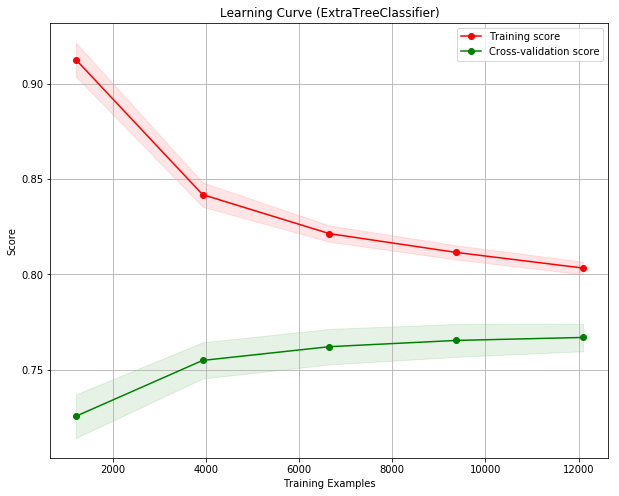

In [123]:
# Plotting learning curve
title = 'Learning Curve (ExtraTreeClassifier)'
# cross validation with 50 iterations to have a smoother curve
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
model = etc
plot_learning_curve(model,title,X_train, y_train, n_jobs=-1,ylim=None,cv=cv)
plt.show()

A learning curve is a graphical representation of how an increase in learning (measured on the vertical axis) comes from greater experience (the horizontal axis); or how the more someone (or something) performs a task, the better they get at it.

Plots relating performance to experience are widely used in machine learning. Performance is the error rate or accuracy of the learning system, while experience may be the number of training examples used for learning or the number of iterations used in optimizing the system model parameters.The machine learning curve is useful for many purposes including comparing different algorithms, choosing model parameters during design,adjusting optimization to improve convergence, and determining the amount of data used for training.

# Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
# Setting parameters
x_data, x_test_data, y_data, y_test_data = train_test_split(X_train, y_train, test_size = 0.3)
rf_para = [{'n_estimators':[50, 100], 'max_depth':[5,10,15], 'max_features':[0.1, 0.3], \
           'min_samples_leaf':[1,3], 'bootstrap':[True, False]}]

In [125]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
rfc = GridSearchCV(RandomForestClassifier(), param_grid=rf_para, cv = 10, n_jobs=-1)
rfc.fit(x_data, y_data)
rfc.best_params_
rfc.grid_scores_

[mean: 0.68604, std: 0.01772, params: {'max_features': 0.1, 'n_estimators': 50, 'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1},
 mean: 0.69038, std: 0.01763, params: {'max_features': 0.1, 'n_estimators': 100, 'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1},
 mean: 0.68840, std: 0.01407, params: {'max_features': 0.1, 'n_estimators': 50, 'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 3},
 mean: 0.69180, std: 0.01333, params: {'max_features': 0.1, 'n_estimators': 100, 'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 3},
 mean: 0.70437, std: 0.01242, params: {'max_features': 0.3, 'n_estimators': 50, 'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1},
 mean: 0.70625, std: 0.01352, params: {'max_features': 0.3, 'n_estimators': 100, 'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1},
 mean: 0.70153, std: 0.01458, params: {'max_features': 0.3, 'n_estimators': 50, 'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 3},
 mean: 0.70087, std: 0.0

In [126]:
print ('Best accuracy obtained: {}'.format(rfc.best_score_))
print ('Parameters:')
for key, value in rfc.best_params_.items():
    print('\t{}:{}'.format(key,value))

Best accuracy obtained: 0.851757369615
Parameters:
	max_features:0.3
	n_estimators:50
	bootstrap:False
	max_depth:15
	min_samples_leaf:1


In [127]:
# Best params: {'max_features': 0.3, 'n_estimators': 100, 'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1}
RFC = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=0.3, bootstrap=True, min_samples_leaf=1,n_jobs=-1)
RFC.fit(X_train, y_train)
# y_pred = RFC.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Learning Curve
Random forest classifier

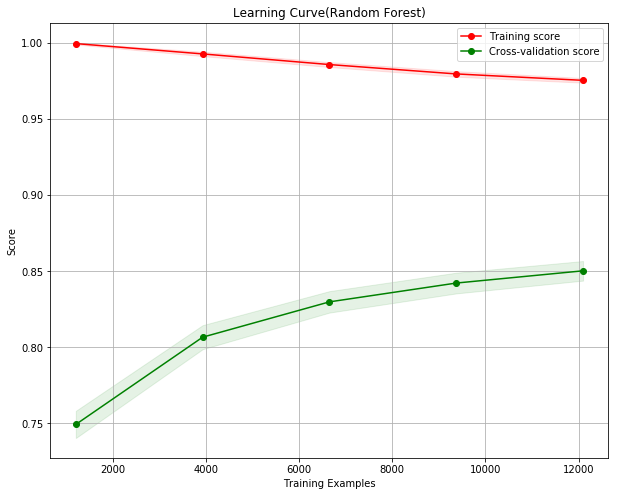

In [128]:
# Plotting Learning Curve
title = 'Learning Curve(Random Forest)'
model = RFC
cv = ShuffleSplit(n_splits=50, test_size=0.2,random_state=0)
plot_learning_curve(model,title,X_train, y_train, n_jobs=-1,ylim=None,cv=cv)
plt.show()

# Xgboost

In [129]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedKFold
from scipy.stats import randint, uniform

In [130]:
cv = StratifiedKFold(y_train, n_folds=10, shuffle=True)

params_dist_grid = {
    'max_depth': [1, 5, 10],
    'gamma': [0, 0.5, 1],
    'n_estimators': randint(1, 1001), # uniform discrete random distribution
    'learning_rate': uniform(), # gaussian distribution
    'subsample': uniform(), # gaussian distribution
    'colsample_bytree': uniform(), # gaussian distribution
    'reg_lambda':uniform(),
    'reg_alpha':uniform()
    }

xgbc_fixed = {'booster':['gbtree'], 'silent':1}

In [131]:
bst_gridd = RandomizedSearchCV(estimator=XGBClassifier(*xgbc_fixed), param_distributions=params_dist_grid,\
                               scoring='accuracy', cv=cv, n_jobs=-1)

In [132]:
#bst_gridd.fit(X_train, y_train)
#bst_gridd.grid_scores_

#print ('Best accuracy obtained: {}'.format(bst_gridd.best_score_))
#print ('Parameters:')
#for key, value in bst_gridd.best_params_.items():
    #print('\t{}:{}'.format(key,value))

In [133]:
# Best parameters selected using code in above cell
# Splitting the train data to test the best parameters
from sklearn.model_selection import train_test_split
seed = 123
x_data, x_test_data, y_data, y_test_data = train_test_split(X_train, y_train, test_size = 0.3,random_state=seed)

eval_set = [(x_test_data, y_test_data)]

XGBC = XGBClassifier(silent=1,n_estimators=641,learning_rate=0.2,max_depth=10,gamma=0.5,nthread=-1,\
                    reg_alpha = 0.05, reg_lambda= 0.35, max_delta_step = 1, subsample = 0.83, colsample_bytree = 0.6)

In [134]:
# Calculating error
XGBC.fit(x_data, y_data, early_stopping_rounds=100, eval_set=eval_set, eval_metric='merror', verbose=True)

pred = XGBC.predict(x_test_data)

accuracy = accuracy_score(y_test_data, pred);
print ('accuracy:%0.2f%%'%(accuracy*100))

[0]	validation_0-merror:0.404762
Will train until validation_0-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.284832
[2]	validation_0-merror:0.227513
[3]	validation_0-merror:0.202381
[4]	validation_0-merror:0.193342
[5]	validation_0-merror:0.19246
[6]	validation_0-merror:0.18761
[7]	validation_0-merror:0.181878
[8]	validation_0-merror:0.177028
[9]	validation_0-merror:0.17769
[10]	validation_0-merror:0.169312
[11]	validation_0-merror:0.16821
[12]	validation_0-merror:0.166667
[13]	validation_0-merror:0.166667
[14]	validation_0-merror:0.164903
[15]	validation_0-merror:0.164462
[16]	validation_0-merror:0.162037
[17]	validation_0-merror:0.157407
[18]	validation_0-merror:0.156305
[19]	validation_0-merror:0.155203
[20]	validation_0-merror:0.154321
[21]	validation_0-merror:0.154321
[22]	validation_0-merror:0.152778
[23]	validation_0-merror:0.151675
[24]	validation_0-merror:0.149471
[25]	validation_0-merror:0.148148
[26]	validation_0-merror:0.146825
[27]	validation_0-merror:0.1

[237]	validation_0-merror:0.135141
[238]	validation_0-merror:0.134921
[239]	validation_0-merror:0.1347
[240]	validation_0-merror:0.134921
[241]	validation_0-merror:0.135141
[242]	validation_0-merror:0.1347
[243]	validation_0-merror:0.1347
Stopping. Best iteration:
[143]	validation_0-merror:0.133377

accuracy:86.66%


In [143]:
X_test = np.concatenate((X_test_temp, df_test.iloc[:,Size:c]), axis = 1)

In [144]:
xgbc_pred= XGBC.predict(X_test)

In [147]:
# saving to a csv file to make submission
df_test = pd.read_csv('D:\Machine Learning\Kaggle\Forest Cover/test.csv')
solution = pd.DataFrame({'Id':df_test.Id, 'Cover_Type':xgbc_pred}, columns = ['Id','Cover_Type'])
solution.to_csv('Xgboost_sol.csv', index=False)